### Package Importing

In [1]:
#Vital Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import time
import re
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen

#Plotting Packages
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
from IPython.display import display
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
import cufflinks as cf
cf.go_offline()
import plotly.plotly as py
import plotly.graph_objs.layout as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

3.10.0


C:\Users\ccearle\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\ccearle\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [2]:
#Increase display options for Pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = 150

In [3]:
%matplotlib inline

In [35]:
path = "D:/PATSTAT Result Data Sets/Final Data Sets/Canadian Inventors Datasets/"
basecase_CA_inventions = pd.read_csv(path + "basecase_CA_inventions.csv")
weighted_assignee_closest_date_CA_inventions = pd.read_csv(path + "weighted_assignee_closest_date_CA_inventions.csv")
assignee_closest_date_CA_inventions = pd.read_csv(path + "assignee_closest_date_CA_inventions.csv")
weighted_basecase_CA_inventions = pd.read_csv(path + "weighted_basecase_CA_inventions.csv")

In [36]:
def cleanup(df):
    return df[df["appln_auth"] != "WO"]

In [37]:
basecase_CA_inventions = cleanup(basecase_CA_inventions)
weighted_assignee_closest_date_CA_inventions = cleanup(weighted_assignee_closest_date_CA_inventions)
assignee_closest_date_CA_inventions = cleanup(assignee_closest_date_CA_inventions)
weighted_basecase_CA_inventions = cleanup(weighted_basecase_CA_inventions)

Text(0.5, 1.0, 'Application Filings by Country by Canadians \n - Weighted Closest Date')

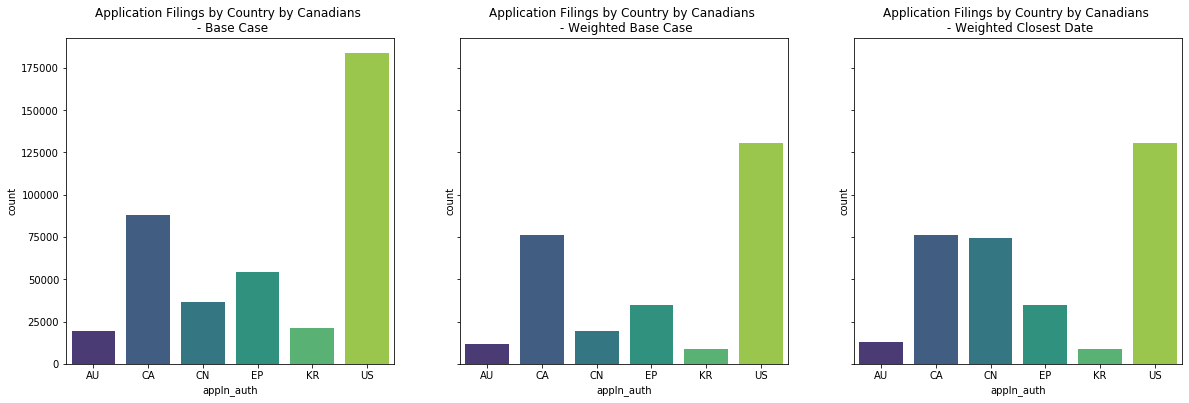

In [38]:
#We can look at filings by country to see where else Canadian's file patents
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize = (20,6))

sns.countplot(x = "appln_auth",
              order = ["AU", "CA", "CN", "EP", "KR", "US"],
              palette = "viridis",
              data = basecase_CA_inventions[(basecase_CA_inventions["appln_auth"] == "CA") | (basecase_CA_inventions["appln_auth"] == "US") | (basecase_CA_inventions["appln_auth"] == "EP") | (basecase_CA_inventions["appln_auth"] == "CN") | (basecase_CA_inventions["appln_auth"] == "AU") | (basecase_CA_inventions["appln_auth"] == "KR")].drop_duplicates("appln_id"),
              ax = ax1
             ).set_title("Application Filings by Country by Canadians \n - Base Case")

sns.countplot(x = "appln_auth",
              order = ["AU", "CA", "CN", "EP", "KR", "US"],
              palette = "viridis",
              data = weighted_basecase_CA_inventions[(weighted_basecase_CA_inventions["appln_auth"] == "CA") | (weighted_basecase_CA_inventions["appln_auth"] == "US") | (weighted_basecase_CA_inventions["appln_auth"] == "EP") | (weighted_basecase_CA_inventions["appln_auth"] == "CN") | (weighted_basecase_CA_inventions["appln_auth"] == "AU") | (weighted_basecase_CA_inventions["appln_auth"] == "KR")].drop_duplicates("appln_id"),
              ax = ax2
             ).set_title("Application Filings by Country by Canadians \n - Weighted Base Case")

sns.countplot(x = "appln_auth",
              order = ["AU", "CA", "CN", "EP", "KR", "US"],
              palette = "viridis",
              data = weighted_assignee_closest_date_CA_inventions[(weighted_assignee_closest_date_CA_inventions["appln_auth"] == "CA") | (weighted_assignee_closest_date_CA_inventions["appln_auth"] == "US") | (weighted_assignee_closest_date_CA_inventions["appln_auth"] == "EP") | (weighted_assignee_closest_date_CA_inventions["appln_auth"] == "CN") | (weighted_assignee_closest_date_CA_inventions["appln_auth"] == "AU") | (weighted_assignee_closest_date_CA_inventions["appln_auth"] == "KR")].drop_duplicates("appln_id"),
              ax = ax3
             ).set_title("Application Filings by Country by Canadians \n - Weighted Closest Date")



In [39]:
def vennSectionAssigner(df, country1, country2):
    try:
        df.reset_index(inplace = True)
    except:
        pass
    earliestIDList = (df["earliest_filing_id"].unique())
    df.set_index(["earliest_filing_id", "appln_auth"], inplace = True)

    vennDict  = {"Venn1": [],
                "Venn2": [],
                "Venn3": [],
                "Venn4": [],
                "Venn5": [],
                "Venn6": [],
                "Venn7": []}
  
    for i in earliestIDList:
        #needs to create a subframe by a unique number to eliminated duplication.
        #My original code used appl_nr but the id works fine too.
        subframe = df["appln_id"].loc[i]
        countryCheck = set(subframe.index)
    
        CACheck = False
        USCheck = False
        RotWCheck = False
    
        for j in countryCheck:
            #swtich CA to country x
            if j == country1:
                CACheck = True
            #switch US to country y
            elif j == country2:
                USCheck = True
            else:
                RotWCheck = True
    
        if (CACheck == True) & (USCheck == False) & (RotWCheck == False):
            vennDict["Venn1"].append(i)
        elif (CACheck == False) & (USCheck == True) & (RotWCheck == False):
            vennDict["Venn2"].append(i)
        elif (CACheck == True) & (USCheck == True) & (RotWCheck == False):
            vennDict["Venn3"].append(i)
        elif (CACheck == False) & (USCheck == False) & (RotWCheck == True):
            vennDict["Venn4"].append(i)
        elif (CACheck == True) & (USCheck == False) & (RotWCheck == True):
            vennDict["Venn5"].append(i)
        elif (CACheck == False) & (USCheck == True) & (RotWCheck == True):
            vennDict["Venn6"].append(i)
        elif (CACheck == True) & (USCheck == True) & (RotWCheck == True):
            vennDict["Venn7"].append(i)
        else:
            print("A 'False-False-False' case has been raised for id " + str(i))

    return vennDict

In [21]:
timeStart = time.time()
vennSectionDictBase = vennSectionAssigner(basecase_CA_inventions, "CA", "US")
vennSectionDictWeighted = vennSectionAssigner(weighted_assignee_closest_date_CA_inventions, "CA", "US")
vennSectionDictClosest = vennSectionAssigner(assignee_closest_date_CA_inventions, "CA", "US")
timeTotal = time.time() - timeStart
timeTotal

3240.869541168213

In [40]:
timeStart = time.time()
vennSectionDictBaseWeight = vennSectionAssigner(weighted_basecase_CA_inventions, "CA", "US")
timeTotal = time.time() - timeStart
timeTotal

53.7313711643219

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Base Case')

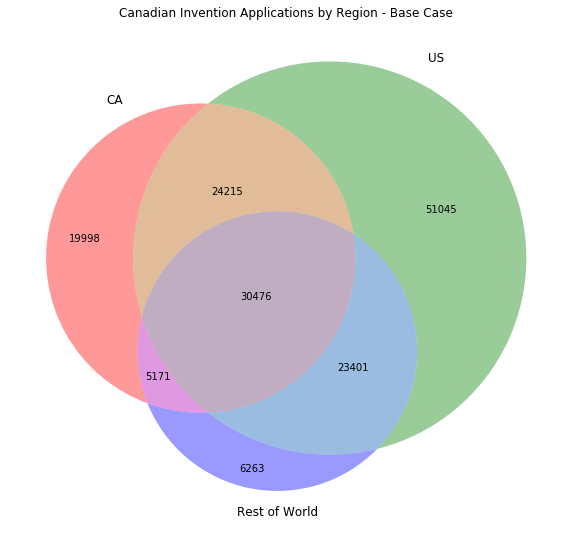

In [26]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictBase["Venn1"]),
                 len(vennSectionDictBase["Venn2"]),
                 len(vennSectionDictBase["Venn3"]),
                 len(vennSectionDictBase["Venn4"]),
                 len(vennSectionDictBase["Venn5"]),
                 len(vennSectionDictBase["Venn6"]),
                 len(vennSectionDictBase["Venn7"]),
                ), set_labels = ('CA', 'US', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Base Case")

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Weighted Base Case')

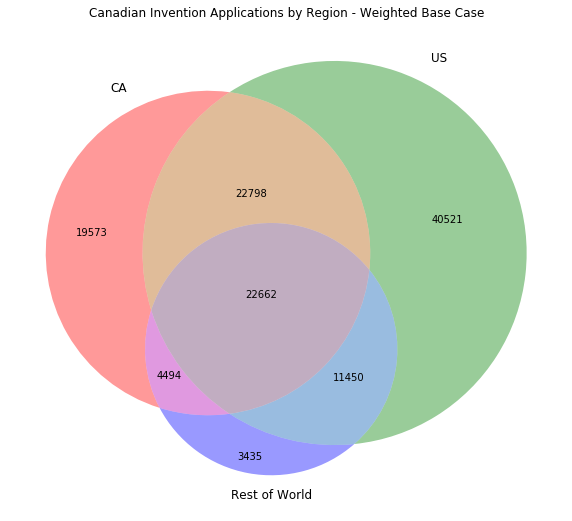

In [41]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictBaseWeight["Venn1"]),
                 len(vennSectionDictBaseWeight["Venn2"]),
                 len(vennSectionDictBaseWeight["Venn3"]),
                 len(vennSectionDictBaseWeight["Venn4"]),
                 len(vennSectionDictBaseWeight["Venn5"]),
                 len(vennSectionDictBaseWeight["Venn6"]),
                 len(vennSectionDictBaseWeight["Venn7"]),
                ), set_labels = ('CA', 'US', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Weighted Base Case")

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Weighted Assignee')

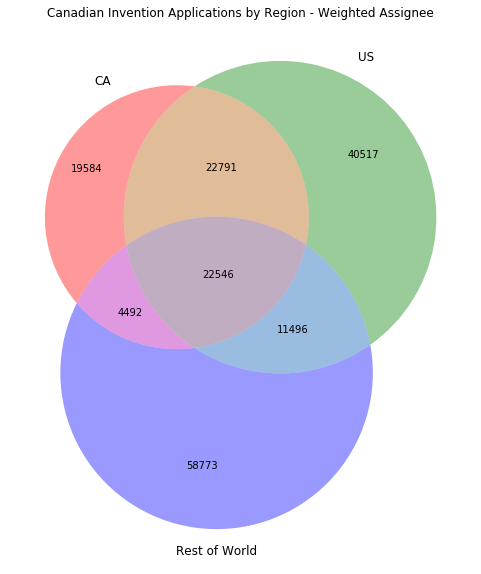

In [42]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictWeighted["Venn1"]),
                 len(vennSectionDictWeighted["Venn2"]),
                 len(vennSectionDictWeighted["Venn3"]),
                 len(vennSectionDictWeighted["Venn4"]),
                 len(vennSectionDictWeighted["Venn5"]),
                 len(vennSectionDictWeighted["Venn6"]),
                 len(vennSectionDictWeighted["Venn7"]),
                ), set_labels = ('CA', 'US', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Weighted Assignee")

In [43]:
timeStart = time.time()
vennSectionDictBase = vennSectionAssigner(basecase_CA_inventions, "CA", "CN")
vennSectionDictWeighted = vennSectionAssigner(weighted_assignee_closest_date_CA_inventions, "CA", "CN")
vennSectionDictClosest = vennSectionAssigner(assignee_closest_date_CA_inventions, "CA", "CN")
vennSectionDictBaseWeight = vennSectionAssigner(weighted_basecase_CA_inventions, "CA", "CN")
timeTotal = time.time() - timeStart
timeTotal

3368.832953929901

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Base Case')

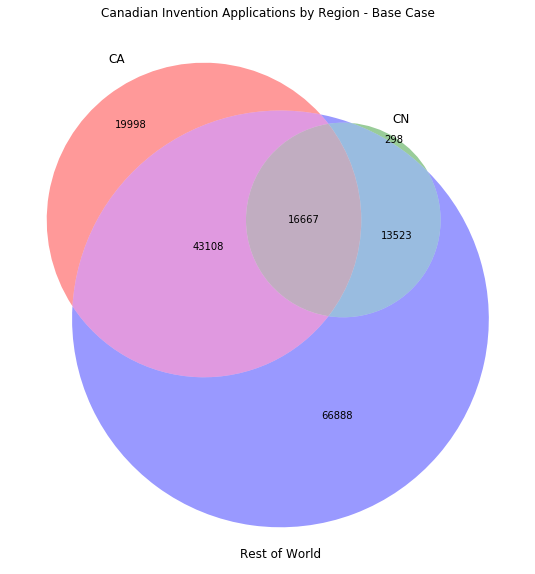

In [45]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictBase["Venn1"]),
                 len(vennSectionDictBase["Venn2"]),
                 len(vennSectionDictBase["Venn3"]),
                 len(vennSectionDictBase["Venn4"]),
                 len(vennSectionDictBase["Venn5"]),
                 len(vennSectionDictBase["Venn6"]),
                 len(vennSectionDictBase["Venn7"]),
                ), set_labels = ('CA', 'CN', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Base Case")

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Weighted Base Case')

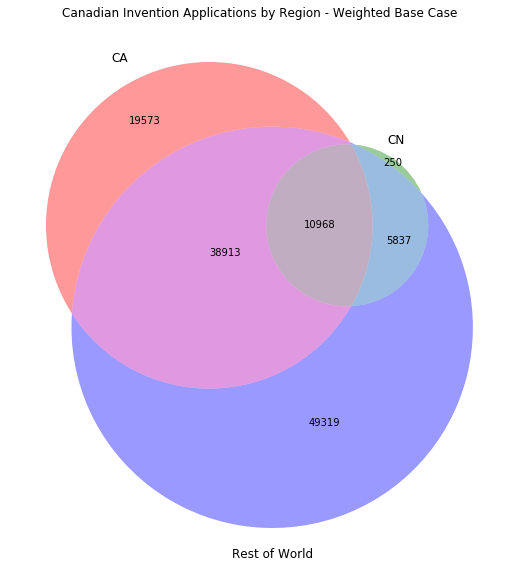

In [46]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictBaseWeight["Venn1"]),
                 len(vennSectionDictBaseWeight["Venn2"]),
                 len(vennSectionDictBaseWeight["Venn3"]),
                 len(vennSectionDictBaseWeight["Venn4"]),
                 len(vennSectionDictBaseWeight["Venn5"]),
                 len(vennSectionDictBaseWeight["Venn6"]),
                 len(vennSectionDictBaseWeight["Venn7"]),
                ), set_labels = ('CA', 'CN', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Weighted Base Case")

Text(0.5, 1.0, 'Canadian Invention Applications by Region - Weighted Assignee')

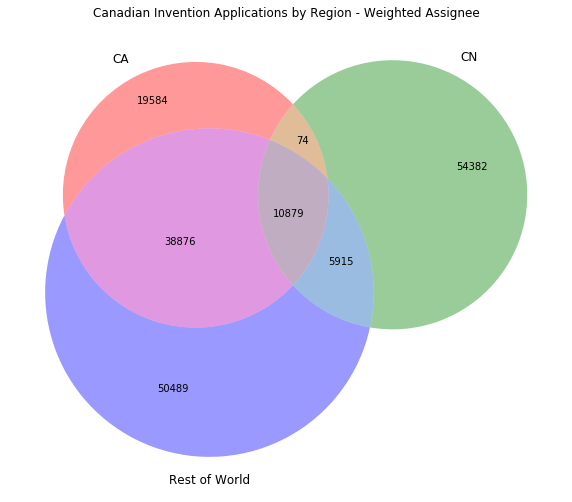

In [48]:
plt.figure(figsize = (10,10))
venn3(subsets = (len(vennSectionDictWeighted["Venn1"]),
                 len(vennSectionDictWeighted["Venn2"]),
                 len(vennSectionDictWeighted["Venn3"]),
                 len(vennSectionDictWeighted["Venn4"]),
                 len(vennSectionDictWeighted["Venn5"]),
                 len(vennSectionDictWeighted["Venn6"]),
                 len(vennSectionDictWeighted["Venn7"]),
                ), set_labels = ('CA', 'CN', 'Rest of World'))

plt.title("Canadian Invention Applications by Region - Weighted Assignee")

In [49]:
data = pd.read_csv("D:/PATSTAT Result Data Sets/master_data_set_merged_imputed_efid_assignee.csv")

C:\Users\ccearle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (6,7,15) have mixed types. Specify dtype option on import or set low_memory=False.



In [50]:
data.drop(columns="Unnamed: 0", inplace = True)
data.drop_duplicates(inplace = True)

In [118]:
data = data[data["invt_seq_nr"] > 0]

In [51]:
country_count = pd.DataFrame(data.groupby("earliest_filing_id")["appln_auth"].nunique())
country_count_clean = pd.DataFrame(country_count.appln_auth.value_counts()).reset_index().rename(columns={"index":"offices_filed_in"})

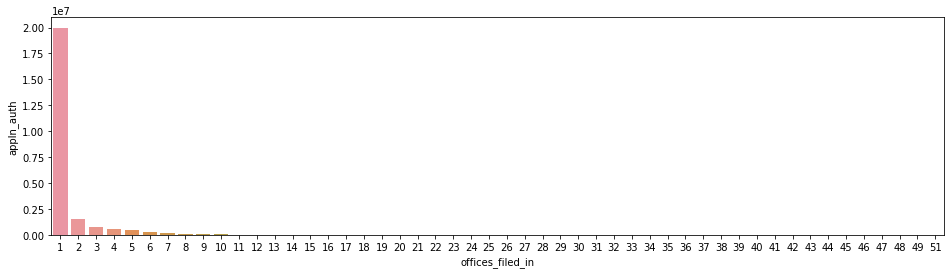

In [58]:
plt.figure(figsize = (16,4))
sns.barplot(data = country_count_clean, x = "offices_filed_in", y = "appln_auth")

In [60]:
data.head()

appln_psn_id  appln_id appln_auth appln_filing_date  earliest_filing_id  \
0    3021428479        30         EP        2002-05-03            24011654   
1    3023124355        30         EP        2002-05-03            24011654   
2    3023285472        30         EP        2002-05-03            24011654   
3     363701329        36         EP        2003-04-03            13037931   
4    3631992408        36         EP        2003-04-03            13037931   

                             person_address person_ctry_code    psn_id  \
0                  Karaportti 3,02610 Espoo               FI  21428479   
1          Holmanmaentie 3A,FIN-02240 Espoo               FI  23124355   
2  Kristianinkatu 7 C 41,FIN-00170 Helsinki               FI  23285472   
3        Carl-Zeiss-Promenade 10,07745 Jena               DE   3701329   
4            Ricarda-Huch-Weg 26,07743 Jena               DE  31992408   

                  psn_name  applt_seq_nr  invt_seq_nr  assignee_id  \
0           NOKIA NETWORKS             1            0     21428479   
1       PIETILAINEN, ANTTI             0            1     21428479   
2      POHJOLA, OLLI-PEKKA             0            2     21428479   
3  CARL ZEISS MICROIMAGING             1            0      3701329   
4      WOLLESCHENSKY, RALF             0            1      3701329   

  imputed_country_efid closest_date_ctry_code days_between weighted_ctry_code  \
0                   FI                     FI          NaN                 FI   
1                   FI                     FI          NaN                 FI   
2                   FI                     FI          NaN                 FI   
3                   DE                     DE          NaN                 DE   
4                   DE                     DE          NaN                 DE   

   imputed_country_weight  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

In [62]:
#What's going on with all the newly China patents?
#patents which are filed in China, start off as null inventors and finish with some assignee imputed code
data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"].notna())]

appln_psn_id   appln_id appln_auth appln_filing_date  \
774272         67675036371984    6767503         CN        2002-01-18   
774939        676785126734680    6767851         CN        2002-01-10   
774940         67678514183384    6767851         CN        2002-01-10   
775281        676819917774475    6768199         CN        2002-01-15   
776647        676916733359106    6769167         CN        2002-02-08   
776648        676916718047179    6769167         CN        2002-02-08   
779512         67708448485152    6770844         CN        2002-03-01   
780163        677170617427174    6771706         CN        2002-04-17   
780166        677170631159216    6771706         CN        2002-04-17   
780987         67727613539025    6772761         CN        2002-03-06   
780988        677276117405321    6772761         CN        2002-03-06   
781909        677400717608647    6774007         CN        2002-03-28   
781943        677402218032703    6774022         CN        2002-03-28   
783138        677483413699568    6774834         CN        2002-01-25   
783297        677489031172152    6774890         CN        2002-02-08   
784381        677530331155350    6775303         CN        2002-04-30   
785395        677567126734243    6775671         CN        2002-02-08   
792500        677813131162278    6778131         CN        2002-02-07   
792892         67782779975691    6778277         CN        2002-03-26   
792893        677827732088945    6778277         CN        2002-03-26   
794573        677891832863164    6778918         CN        2002-03-22   
796940        677979718040916    6779797         CN        2002-02-05   
796941         67797976133791    6779797         CN        2002-02-05   
797496        677998732195093    6779987         CN        2002-06-21   
797497         67799876336775    6779987         CN        2002-06-21   
797498        677998733389036    6779987         CN        2002-06-21   
797499        677998732305948    6779987         CN        2002-06-21   
797702        678006226537852    6780062         CN        2002-01-14   
801491        678151231141362    6781512         CN        2002-03-26   
802100        678174731168856    6781747         CN        2002-04-11   
802345        678184119520619    6781841         CN        2002-04-26   
803582        678233117778502    6782331         CN        2002-04-22   
803583        678233131151562    6782331         CN        2002-04-22   
803584        678233133397277    6782331         CN        2002-04-22   
804172        678256315297606    6782563         CN        2002-04-29   
805012        678289629929508    6782896         CN        2002-05-24   
805013        678289631175431    6782896         CN        2002-05-24   
805014        678289617749649    6782896         CN        2002-05-24   
805015         67828966133148    6782896         CN        2002-05-24   
805016        678289622774960    6782896         CN        2002-05-24   
805143         67829475814707    6782947         CN        2002-05-23   
805548       6783253158209731    6783253         CN        2002-04-29   
806363         67842984204630    6784298         CN        2002-05-13   
806364        678429832358364    6784298         CN        2002-05-13   
809394        678619233406294    6786192         CN        2002-06-19   
813494         67889004179904    6788900         CN        2002-07-12   
814509        678971012375304    6789710         CN        2002-06-28   
814510        678971033609033    6789710         CN        2002-06-28   
814511        678971012028168    6789710         CN        2002-06-28   
814799        678989213671600    6789892         CN        2002-07-25   
816218        679042233361313    6790422         CN        2002-08-05   
816219        679042232391842    6790422         CN        2002-08-05   
816220         67904225888366    6790422         CN        2002-08-05   
817227         67911942481859    6791194         CN        2002-07-25   
81

In [64]:
#patents which are filed in China, start as NA, are NA after imputing on family and are CA after imputing on assignee
data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"]=="CA") & (data["imputed_country_efid"].isna())]

appln_psn_id   appln_id appln_auth appln_filing_date  \
801491       678151231141362    6781512         CN        2002-03-26   
864127       681582717403724    6815827         CN        2002-11-26   
864128       681582717403724    6815827         CN        2002-11-26   
864129       681582817403724    6815828         CN        2002-11-26   
864130       681582817403724    6815828         CN        2002-11-26   
1079816      693594812079825    6935948         CN        2003-04-15   
1079817       69359488478170    6935948         CN        2003-04-15   
1079818       69359488865737    6935948         CN        2003-04-15   
1089990      695932018860778    6959320         CN        2003-05-29   
1089991      695932026331643    6959320         CN        2003-05-29   
1126306       70467673314600    7046767         CN        2003-01-09   
1141634      705177117032753    7051771         CN        2003-05-08   
1142937       70522054338093    7052205         CN        2003-03-10   
1147666      705376525487785    7053765         CN        2003-03-27   
1154859        7056089959832    7056089         CN        2003-06-24   
1163619      705891719071036    7058917         CN        2003-07-15   
1165426      705950032112203    7059500         CN        2003-07-28   
1165949       70596535127560    7059653         CN        2003-06-19   
1166841      705993923353899    7059939         CN        2003-07-31   
1166842      705993923353899    7059939         CN        2003-07-31   
1170602      706117726334806    7061177         CN        2003-07-15   
1171169       70613538693718    7061353         CN        2003-07-03   
1171170       70613537757463    7061353         CN        2003-07-03   
1173849       70622013176137    7062201         CN        2003-07-23   
1178095      706353721059376    7063537         CN        2003-09-02   
1183978      706541915683590    7065419         CN        2003-09-26   
1184375        7065563169932    7065563         CN        2003-08-18   
1184533        7065610685334    7065610         CN        2003-08-19   
1185964       70661204647577    7066120         CN        2003-09-05   
1186006      706613916771005    7066139         CN        2003-07-10   
1186482      706632221850786    7066322         CN        2003-09-09   
1188089      706699711915918    7066997         CN        2003-06-23   
1197016       77977294183001    7797729         CN        2003-12-12   
1204128      782596124722690    7825961         CN        2003-10-02   
1210560      782832420539398    7828324         CN        2003-10-02   
1212974      782921917399956    7829219         CN        2003-10-02   
1213196      782930117399956    7829301         CN        2003-10-02   
1213785      782950718545283    7829507         CN        2003-11-18   
1221405       78322935204082    7832293         CN        2003-10-22   
1221406      783229322531731    7832293         CN        2003-10-22   
1221407      783229311400512    7832293         CN        2003-10-22   
1221711      783239718308864    7832397         CN        2003-11-12   
1223513       78330351987784    7833035         CN        2003-10-28   
1227182      783498230792004    7834982         CN        2003-12-24   
1230907      841423922869800    8414239         CN        2003-04-10   
1235151       87051658693718    8705165         CN        2003-07-03   
1235152       87051657757463    8705165         CN        2003-07-03   
1235301      870793217869818    8707932         CN        2003-06-20   
1236927      873332823894415    8733328         CN        2003-04-21   
1237425        8741293213997    8741293         CN        2003-06-12   
5335300     5508496320416073   55084963         CN        2003-12-23   
5335302     5508496331297988   55084963         CN        2003-12-23   
5384957      567232641635393   56723264         CN        2003-06-25   
5384958     5672326416968834   56723264         CN        2003-06-25   
5384962      567232647855651   56723264         CN      

In [119]:
#when we start in China with an unknown country, where do most people end up?
#filed to China, start as NA, imputed on EFID is NA, impute on assignee as something
end_country = data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"].notna()) & (data["imputed_country_efid"].isna())]

In [120]:
end_country.head()

appln_psn_id  appln_id appln_auth appln_filing_date  \
774939  676785126734680   6767851         CN        2002-01-10   
774940   67678514183384   6767851         CN        2002-01-10   
775281  676819917774475   6768199         CN        2002-01-15   
776647  676916733359106   6769167         CN        2002-02-08   
776648  676916718047179   6769167         CN        2002-02-08   

        earliest_filing_id person_address person_ctry_code    psn_id  \
774939             6767851            NaN              NaN  26734680   
774940             6767851            NaN              NaN   4183384   
775281             6768199            NaN              NaN  17774475   
776647             6769167            NaN              NaN  33359106   
776648             6769167            NaN              NaN  18047179   

            psn_name  applt_seq_nr  invt_seq_nr  assignee_id  \
774939  SHI GUANGHUA             0            1     18381062   
774940    CHEN JINFU             0            2     18381062   
775281  LIU WENQIANG             1            1     17774475   
776647  ZHANG YAOWEN             0            2     18381062   
776648  LU, DAOZHENG             0            3     18381062   

       imputed_country_efid closest_date_ctry_code  \
774939                  NaN                     CN   
774940                  NaN                     TW   
775281                  NaN                     CN   
776647                  NaN                     CN   
776648                  NaN                     CN   

                        days_between weighted_ctry_code  \
774939    24 days 00:00:00.000000000                 CN   
774940     5 days 00:00:00.000000000                 TW   
775281  1840 days 00:00:00.000000000                 CN   
776647    29 days 00:00:00.000000000                 CN   
776648     9 days 00:00:00.000000000                 CN   

        imputed_country_weight  
774939                     1.0  
774940                     1.0  
775281                     1.0  
776647                     1.0  
776648                     1.0

In [122]:
#value counts for countries imputed ONLY through assignee
end_country["weighted_ctry_code"].value_counts()

CN    2453416
TW     111337
US      73900
JP      16474
SG       9497
DE       8446
CA       8273
GB       7178
HK       6536
KR       5475
CH       4270
NL       4151
FR       3063
SE       2548
AU       2183
IT       1568
BE       1449
FI       1285
AT       1043
IN       1017
DK       1003
IL        942
ES        736
IE        649
NZ        519
SA        431
NO        289
MY        221
RU        220
MO        201
ZA        170
VG        162
TR        147
LU        136
BR        133
CZ        117
HU         90
MX         84
GR         78
PH         75
PT         75
PL         72
TH         64
LI         64
KY         50
SI         46
AR         45
ID         44
EC         43
RS         40
IS         39
UA         36
MC         34
HN         33
EE         32
RO         30
VN         29
IR         29
CL         28
AE         26
FJ         23
SK         23
YU         19
IM         19
HR         19
EP         18
BJ         18
PR         18
MA         17
BY         17
MT         17
DD    

In [123]:
#filed in China, start as NA, finish as something
data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"].notna())]["weighted_ctry_code"].value_counts()

CN    2901645
JP     834640
US     797191
DE     298476
KR     262940
TW     187880
FR      91257
GB      66713
NL      44994
CA      38240
CH      37280
IT      36315
SE      33907
FI      19347
IN      19264
IL      19162
DK      17174
BE      16822
AT      16799
AU      16659
SG      16502
ES      12579
HK       8125
RU       6078
NO       5140
BR       3973
IE       3697
NZ       3556
HU       2764
MY       2662
PL       2426
SA       1961
CZ       1789
MX       1788
ZA       1778
TR       1775
PT       1022
LU        943
TH        858
SI        793
GR        685
PH        567
CU        492
RO        482
UA        477
CL        433
AR        419
SK        311
LI        270
EE        265
IS        240
ID        226
MO        208
AE        193
HR        189
BG        187
LV        182
VG        167
EG        166
RS        165
CO        149
VN        136
LT        124
BY        114
VE         93
MC         92
KZ         74
IR         74
LK         68
MT         62
EC         58
CR    

In [124]:
became_CA = data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"] == "CA")]

In [125]:
became_CA['earliest_filing_id'].nunique()

70892

In [126]:
became_CA_EFID = data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["imputed_country_efid"] == "CA")]

In [127]:
became_CA_EFID["earliest_filing_id"].nunique()

12242

In [130]:
data[(data["appln_auth"] == "CN") & (data["person_ctry_code"]=="CA")]["earliest_filing_id"].nunique()

2283

In [129]:
data2 = pd.DataFrame(data[data["invt_seq_nr"] > 0].groupby(["earliest_filing_id","appln_id"])["closest_date_ctry_code"].value_counts(normalize = True)).rename(columns={"closest_date_ctry_code":"country_code_weighting"})
data2.reset_index(inplace=True)
weighted_assignee_closest_date_CA_inventions = data2[(data2["country_code_weighting"] > 0.5) & (data2["closest_date_ctry_code"] == "CA")]["earliest_filing_id"].unique()

In [81]:
data2[(data2["country_code_weighting"] > 0.5) & (data2["closest_date_ctry_code"] == "CA")]

earliest_filing_id   appln_id closest_date_ctry_code  \
23                       113        113                     CA   
24                       113    1104910                     CA   
25                       113    2766385                     CA   
26                       113    3894131                     CA   
27                       113    4963598                     CA   
28                       113    8656141                     CA   
29                       113   15205361                     CA   
30                       113   39548714                     CA   
31                       113   41064259                     CA   
33                       113   43680846                     CA   
34                       113   55033292                     CA   
35                       113   55414436                     CA   
36                       113   58122549                     CA   
37                       113  337722705                     CA   
666                     1480       1480                     CA   
740                     1636       1636                     CA   
741                     1636    4921361                     CA   
743                     1636   57610710                     CA   
848                     1904       1904                     CA   
849                     1904    4969540                     CA   
850                     1904   55438110                     CA   
851                     1904   55459757                     CA   
876                     1913   55610474                     CA   
882                     1918       1918                     CA   
883                     1918    4980238                     CA   
884                     1918   54954676                     CA   
885                     1918   55047708                     CA   
901                     1927       1927                     CA   
902                     1927    4981483                     CA   
922                     1945       1945                     CA   
923                     1945    4995739                     CA   
924                     1945  317595181                     CA   
925                     1945  317610272                     CA   
998                     2746       2746                     CA   
999                     2746    5014683                     CA   
1000                    2746   55107371                     CA   
1001                    2746   55164541                     CA   
1002                    2746   55277678                     CA   
1003                    2746   55311950                     CA   
1004                    2746  267505319                     CA   
1005                    2746  315544807                     CA   
1006                    2746  317595860                     CA   
1007                    2746  317778221                     CA   
1008                    2746  328360458                     CA   
1009                    2746  330205864                     CA   
1010                    2746  337538011                     CA   
1024                    2768       2768                     CA   
1025                    2768   56652391                     CA   
1026                    2768   56748209                     CA   
1027                    2769       2769                     CA   
1028                    2769   55430239                     CA   
1032                    2780       2780                     CA   
1033                    2780   55542391                     CA   
1034                    2780   57674037                     CA   
1035                    2780   57690684                     CA   
1036                    2780  330273061                     CA   
1037                    2780  365818953                     CA   
1038                    2780  411477696                     CA   
1039                    2781       2781                     CA   
1040                    2781   56869519           

In [83]:
pd.DataFrame(data[data["invt_seq_nr"] > 0].groupby("earliest_filing_id")["closest_date_ctry_code"].value_counts(normalize = True))

closest_date_ctry_code
earliest_filing_id closest_date_ctry_code                        
58                 DE                                    1.000000
76                 BE                                    1.000000
98                 DE                                    1.000000
104                DE                                    1.000000
112                DE                                    1.000000
113                CA                                    0.960000
                   US                                    0.040000
139                DE                                    1.000000
143                DE                                    1.000000
144                DE                                    1.000000
149                DE                                    1.000000
151                DE                                    1.000000
161                CH                                    1.000000
183                AT                                    1.000000
184                DE                                    1.000000
199                DE                                    1.000000
200                AT                                    1.000000
204                AT                                    1.000000
205                DE                                    0.666667
                   AT                                    0.333333
207                PL                                    1.000000
216                DE                                    1.000000
217                DE                                    1.000000
218                DE                                    1.000000
219                DE                                    1.000000
220                DE                                    1.000000
231                DE                                    1.000000
243                DE                                    0.823529
                   DD                                    0.176471
250                DE                                    1.000000
251                DE                                    1.000000
252                DE                                    1.000000
261                DE                                    0.933333
                   US                                    0.066667
266                BE                                    0.400000
                   DE                                    0.400000
                   GB                                    0.200000
268                DE                                    1.000000
274                CH                                    1.000000
278                DK                                    1.000000
280                CH                                    0.909091
                   DE                                    0.090909
281                DE                                    1.000000
282                DE                                    1.000000
283                DE                                    1.000000
284                DE                                    1.000000
291                DE                                    1.000000
293                DE                                    1.000000
294                DE                                    1.000000
295                DE                                    1.000000
296                DE                                    1.000000
297                DE                                    1.000000
314                DE                                    1.000000
322                DE                                    1.000000
329                DE                                    1.000000
334                DE                                    1.000000
346                DE                                    1.000000
347                DE                                    0.939394
                   CH                                    0.045455
                 

In [88]:
pd.DataFrame(data[data["invt_seq_nr"] > 0].groupby(["earliest_filing_id","appln_id"])["closest_date_ctry_code"].value_counts(normalize = True))

closest_date_ctry_code
earliest_filing_id appln_id  closest_date_ctry_code                        
58                 58        DE                                    1.000000
                   1081626   DE                                    1.000000
                   8159976   DE                                    1.000000
                   15193554  DE                                    1.000000
                   48818414  DE                                    1.000000
76                 76        BE                                    1.000000
                   5000260   BE                                    1.000000
                   17505034  BE                                    1.000000
                   41126633  BE                                    1.000000
                   55371177  BE                                    1.000000
                   55460614  BE                                    1.000000
                   55559245  BE                                    1.000000
                   57947139  BE                                    1.000000
98                 98        DE                                    1.000000
                   57804263  DE                                    1.000000
104                104       DE                                    1.000000
                   17532862  DE                                    1.000000
                   57134078  DE                                    1.000000
                   57955171  DE                                    1.000000
                   266850837 DE                                    1.000000
112                112       DE                                    1.000000
                   58097674  DE                                    1.000000
                   58109065  DE                                    1.000000
113                113       CA                                    1.000000
                   1104910   CA                                    1.000000
                   2766385   CA                                    1.000000
                   3894131   CA                                    1.000000
                   4963598   CA                                    1.000000
                   8656141   CA                                    1.000000
                   15205361  CA                                    1.000000
                   39548714  CA                                    1.000000
                   41064259  CA                                    0.750000
                             US                                    0.250000
                   43680846  CA                                    1.000000
                   55033292  CA                                    1.000000
                   55414436  CA                                    1.000000
                   58122549  CA                                    1.000000
                   337722705 CA                                    0.750000
                             US                                    0.250000
139                139       DE                                    1.000000
                   46344069  DE                                    1.000000
                   55308723  DE                                    1.000000
                   55364084  DE                                    1.000000
                   56725088  DE                                    1.000000
                   322445526 DE                                    1.000000
                   322631922 DE                                    1.000000
                   331041570 DE                                    1.000000
143                143       DE                                    1.000000
                   55668794  DE                                    1.000000
                   55685279  DE                                    1.000000
                   55691692  DE                                    1.000000
                   565570

In [84]:
data3 = pd.DataFrame(data[data["invt_seq_nr"] > 0].groupby("earliest_filing_id")["closest_date_ctry_code"].value_counts(normalize = True)).rename(columns={"closest_date_ctry_code":"country_code_weighting"})
data3.reset_index(inplace=True)
weighted_assignee_closest_date_CA_inventions3 = data3[(data3["country_code_weighting"] > 0.5) & (data3["closest_date_ctry_code"] == "CA")]["earliest_filing_id"].unique()

In [87]:
len(set(weighted_assignee_closest_date_CA_inventions) - set(weighted_assignee_closest_date_CA_inventions3))

3769

In [97]:
set(vennSectionDictWeighted["Venn2"]) - set(weighted_assignee_closest_date_CA_inventions3)

{6963979,
 8471683,
 8589975,
 56872915,
 318182523,
 333469423,
 334227199,
 334227238,
 364417650,
 375138170,
 410195066,
 418563334,
 419748636,
 420595506,
 442620801,
 448735073,
 467715799,
 901487110}

In [135]:
#look at where a patent was filed in China, the inventor country code was unknown, the imputed EFID gave nothing and the imputed assignee returned something
data4 = pd.DataFrame(data[(data["appln_auth"] == "CN") & (data["person_ctry_code"].isna()) & (data["closest_date_ctry_code"].notna()) & (data["imputed_country_efid"].isna())].groupby("earliest_filing_id")["closest_date_ctry_code"].value_counts(normalize = True)).rename(columns={"closest_date_ctry_code":"country_code_weighting"})

In [136]:
#Look at the list of inventions which are now considered "Canadian Owned"
data4.reset_index(inplace = True)
check_IDs = data4[(data4["country_code_weighting"] > 0.5) & (data4["closest_date_ctry_code"] == "CA")]["earliest_filing_id"].unique()

In [137]:
data[data["earliest_filing_id"].isin(check_IDs)].drop_duplicates("appln_id")["appln_auth"].value_counts()

CN    56872
US     4088
EP     1994
WO     1600
KR     1377
CA     1152
JP     1081
TW      815
AU      765
BR      533
MX      501
HK      346
RU      312
ES      285
SG      251
DE      238
ZA      207
NZ      202
AT      184
DK      167
AR      130
PT       93
MY       90
EA       89
GB       73
SI       70
PL       58
CO       54
HU       53
UA       50
PE       47
HR       46
CL       41
NO       40
CY       37
IN       33
MA       29
CR       22
IL       21
RS       20
EC       20
LT       18
UY       16
AP       16
TN       15
PH       15
FR       14
SM        9
DO        8
ME        7
IS        5
SA        5
EG        5
PA        4
TR        4
RO        4
GT        4
CU        4
SE        3
YU        3
GE        3
JO        3
LU        1
NI        1
FI        1
SV        1
HN        1
Name: appln_auth, dtype: int64

In [141]:
china_only = data[data["earliest_filing_id"].isin(set(vennSectionDictWeighted["Venn2"]))]

In [142]:
china_only.head()

appln_psn_id  appln_id appln_auth appln_filing_date  \
801491   678151231141362   6781512         CN        2002-03-26   
807207   678498133591444   6784981         CN        2002-05-16   
811321   678787233283022   6787872         CN        2002-06-19   
846577  6805309169049530   6805309         CN        2002-08-23   
846578   680531017463239   6805310         CN        2002-08-23   

        earliest_filing_id person_address person_ctry_code     psn_id  \
801491             6781512            NaN              NaN   31141362   
807207             6784981            NaN               CA   33591444   
811321             6787872            NaN               CA   33283022   
846577             6805309            NaN               CA  169049530   
846578             6805310            NaN               CA   17463239   

                            psn_name  applt_seq_nr  invt_seq_nr  assignee_id  \
801491                       WANG BO             1            1     31141362   
807207                      ZHU HONG             1            1     33591444   
811321  ZENG HEPING,LIANG FENG,WU LI             0            1     13288541   
846577                   LIANG GUOEN             1            1    169049530   
846578                   LIANG GUOEN             1            1     17463239   

       imputed_country_efid closest_date_ctry_code  \
801491                  NaN                     CA   
807207                   CA                     CA   
811321                   CA                     CA   
846577                   CA                     CA   
846578                   CA                     CA   

                      days_between weighted_ctry_code  imputed_country_weight  
801491  30 days 00:00:00.000000000                 CN                     0.8  
807207                         NaN                 CA                     NaN  
811321                         NaN                 CA                     NaN  
846577                         NaN                 CA                     NaN  
846578                         NaN                 CA                     NaN

In [145]:
china_only[(china_only["person_ctry_code"].isna()) & (china_only["closest_date_ctry_code"].notna())]["earliest_filing_id"].nunique()

54178